## Introduction

In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:
- population - The population as of 2015.
- population_growth - The annual population growth rate, as a percentage.
- area - The total land and water area.

In [9]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()

q = "SELECT * FROM sqlite_master WHERE type='table';"
cursor.execute(q).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

In [10]:
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


## Explore facts table

In [11]:
q = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [6]:
q = "SELECT * FROM facts"
pd.read_sql_query(q, conn)[:5]

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


## Aggregation

In [13]:
q = '''
SELECT 
MIN(population) min_pop,
MAX(population) max_pop,
MIN(population_growth) min_pop_growth,
MAX(population_growth) max_pop_growth
FROM facts
'''
pd.read_sql_query(q, conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


In [19]:
q = '''
SELECT * 
FROM facts
WHERE 
(population == (SELECT MIN(population) FROM facts)) OR
(population == (SELECT MAX(population) FROM facts))
;
'''
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000.0,None,0,NaN,NaN,NaN,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746
1,261,xx,World,None,NaN,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


In [22]:
q = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE 
(population != (SELECT MIN(population) FROM facts)) AND
(population != (SELECT MAX(population) FROM facts))
ORDER BY population DESC
;
'''
pd.read_sql_query(q,conn)

,population,population_growth,birth_rate,death_rate
0,1367485388,0.45,12.49,7.53
1,1251695584,1.22,19.55,7.32
2,513949445,0.25,10.20,10.20
3,321368864,0.78,12.49,8.15
4,255993674,0.92,16.72,6.37
5,204259812,0.77,14.46,6.58
6,199085847,1.46,22.58,6.49
7,181562056,2.45,37.64,12.90
8,168957745,1.60,21.14,5.61
9,142423773,0.04,11.60,13.69


## Visualization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ab38e3da0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2ab376ba58>], dtype=object)

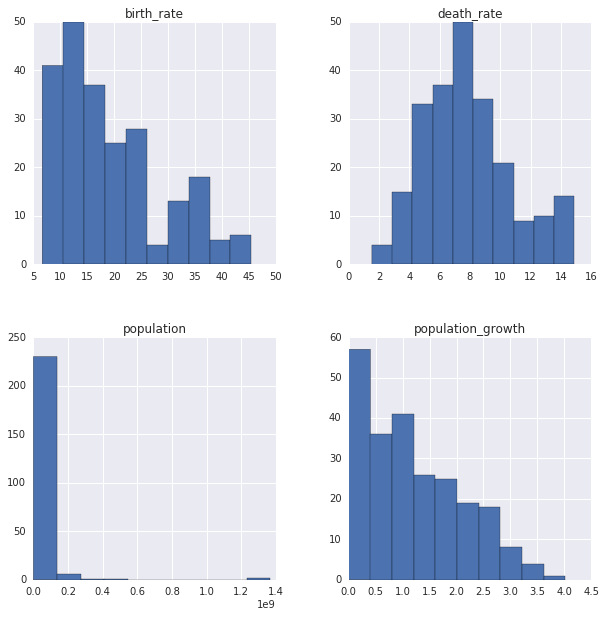

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

fig, ax = plt.subplots(2,2, figsize=(10,10))
# Plot one by one to have control over each plot
#pd.read_sql_query(q,conn).hist('population', ax=ax[0][0])
#pd.read_sql_query(q,conn).hist('population_growth', ax=ax[0][1])
#pd.read_sql_query(q,conn).hist('birth_rate', ax=ax[1][0])
#pd.read_sql_query(q,conn).hist('death_rate', ax=ax[1][1])

pd.read_sql_query(q,conn).hist(ax=ax)

In [52]:
q = '''
SELECT name, CAST(population AS Float)/CAST(area_land AS Float) density
FROM facts
ORDER BY density DESC
LIMIT 20
;
'''
pd.read_sql_query(q,conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ab34e17f0>]], dtype=object)

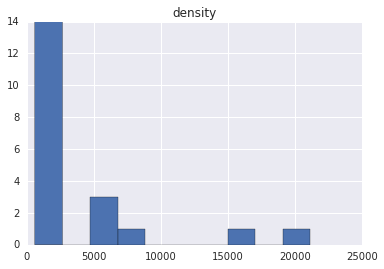

In [56]:
pd.read_sql_query(q,conn).hist()

In [61]:
q = '''
SELECT name, CAST(area_water AS Float)/CAST(area_land AS Float)*100 ratio_water_land
FROM facts
ORDER BY ratio_water_land DESC
LIMIT 20
'''
pd.read_sql_query(q,conn)

,name,ratio_water_land
0,British Indian Ocean Territory,90566.666667
1,Virgin Islands,452.023121
2,Puerto Rico,55.479143
3,"Bahamas, The",38.661339
4,Guinea-Bissau,28.467283
5,Malawi,25.939626
6,Netherlands,22.571032
7,Uganda,22.292237
8,Eritrea,16.435644
9,Liberia,15.623962
